## Lab 4. PCA

### Lab Assignment 4.1.

In this assignment, you're going to experiment with a real life armadillo sculpture scanned using a [Cyberware 3030 MS](http://cyberware.com/products/scanners/px.html) 3D scanner at Stanford University. The sculpture is available as part of their [3D Scanning Repository](https://graphics.stanford.edu/data/3Dscanrep/), and is a very dense 3D mesh consisting of 172974 vertices! The mesh is available for you, located at /Module4/Datasets/<b>stanford_armadillo.ply</b>. It is not a Python file, so don't attempt to load it with a text editor!
![Image of Yaktocat](http://courses.edx.org/asset-v1:Microsoft+DAT210x+4T2016+type@asset+block@armadillo.png)

Open up the Module4/assignment1.py starter code and read through it carefully. You will notice the use of a new library, Plyfile. This library loads up the 3D binary mesh for you. The mesh is further converted into a Pandas dataframe for your ease of manipulation. Complete the following tasks:

1. Before changing any of the code, go ahead and execute assignment1.py. You should see the 3D armadillo. Your goal is to reduce its dimensionality from three to two using PCA to cast a shadow of the data onto its two most important principal components. Then render the resulting 2D scatter plot.
2. Fill out the proper code in the do_PCA() and do_RandomizedPCA() methods. Be sure to return the result of your transformation! You may even want to read the SciKit-Learn documentation on .transform(), just for future reference so you know what data type comes out of it.
3. Re-run the application! Then, answer the questions below:

In [1]:
###############
# Lab.4.2.1. 
# Before changing any of the code, go ahead and execute assignment1.py. 
# You should see the 3D armadillo. Your goal is to reduce its dimensionality 
# from three to two using PCA to cast a shadow of the data onto its two most 
# important principal components. Then render the resulting 2D scatter plot.

# Original Code
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt
import datetime

from mpl_toolkits.mplot3d import Axes3D
from plyfile import PlyData, PlyElement

%pylab inline 
plt.style.use('ggplot') # Look Pretty


# Every 100 data samples, we save 1. If things run too
# slow, try increasing this number. If things run too fast,
# try decreasing it... =)
reduce_factor = 100


# Load up the scanned armadillo
plyfile = PlyData.read('Datasets/stanford_armadillo.ply')
armadillo = pd.DataFrame({
  'x':plyfile['vertex']['z'][::reduce_factor],
  'y':plyfile['vertex']['x'][::reduce_factor],
  'z':plyfile['vertex']['y'][::reduce_factor]
})

Populating the interactive namespace from numpy and matplotlib


In [2]:
armadillo.head()

,x,y,z
0,27.283239,5.894578,11.788401
1,-56.153477,-54.866692,66.677132
2,-55.619434,-55.855236,67.534760
3,28.784435,23.476126,-31.522230
4,-54.396542,-49.803776,75.316780


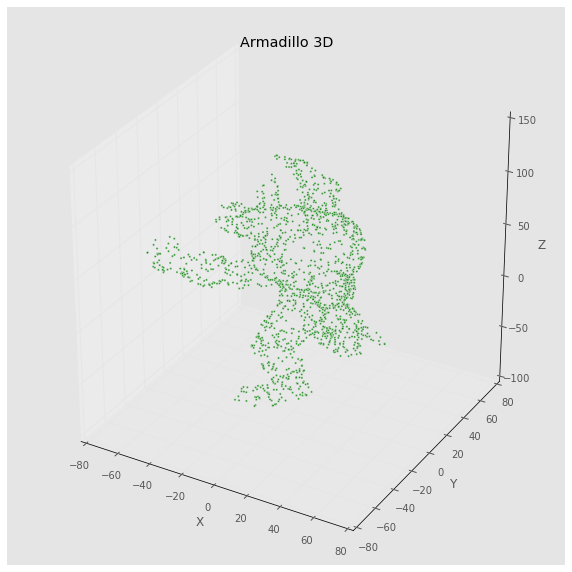

In [5]:
# Render the Original Armadillo
fig = plt.figure(figsize(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Armadillo 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(armadillo.x, armadillo.y, armadillo.z, c='green', marker='.', alpha=0.75)

In [7]:
###############
# Lab.4.2.2. 
# Fill out the proper code in the do_PCA() and do_RandomizedPCA() methods. 
# Be sure to return the result of your transformation! You may even want to 
# read the SciKit-Learn documentation on .transform(), just for future reference 
# so you know what data type comes out of it.

# ** TESTING as it is. *** 

# Time the execution of PCA 5000x
t1 = datetime.datetime.now()
for i in range(5000): pca = do_PCA(armadillo)
time_delta = datetime.datetime.now() - t1

# Render the newly transformed PCA armadillo!
if not pca is None:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title('PCA, build time: ' + str(time_delta))
    ax.scatter(pca[:,0], pca[:,1], c='blue', marker='.', alpha=0.75)

# Time the execution of rPCA 5000x
t1 = datetime.datetime.now()
for i in range(5000): rpca = do_RandomizedPCA(armadillo)
time_delta = datetime.datetime.now() - t1


# Render the newly transformed RandomizedPCA armadillo!
if not rpca is None:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title('RandomizedPCA, build time: ' + str(time_delta))
    ax.scatter(rpca[:,0], rpca[:,1], c='red', marker='.', alpha=0.75)

plt.show()

In [10]:
print pca
print rpca

None
None


In [27]:
from sklearn.decomposition import PCA 
from sklearn.decomposition import RandomizedPCA 

def do_PCA(armadillo):
    # TODO: Write code to import the libraries required for PCA.
    # Then, train your PCA on the armadillo dataframe. Finally,
    # drop one dimension (reduce it down to 2D) and project the
    # armadillo down to the 2D principal component feature space.
    #
    # NOTE: Be sure to RETURN your projected armadillo! 
    # (This projection is actually stored in a NumPy NDArray and
    # not a Pandas dataframe, which is something Pandas does for
    # you automatically. =)
    # .. your code here ..

    pca = PCA(n_components=2) 
    trans_res = pca.fit_transform(armadillo)

    return trans_res


def do_RandomizedPCA(armadillo): 
    # TODO: Write code to import the libraries required for
    # RandomizedPCA. Then, train your RandomizedPCA on the armadillo
    # dataframe. Finally, drop one dimension (reduce it down to 2D)
    # and project the armadillo down to the 2D principal component
    # feature space.
    #
    # NOTE: Be sure to RETURN your projected armadillo! 
    # (This projection is actually stored in a NumPy NDArray and
    # not a Pandas dataframe, which is something Pandas does for
    # you automatically. =)
    #
    rpca = RandomizedPCA(n_components=2)    
    trans_res = rpca.fit_transform(armadillo)

    return trans_res


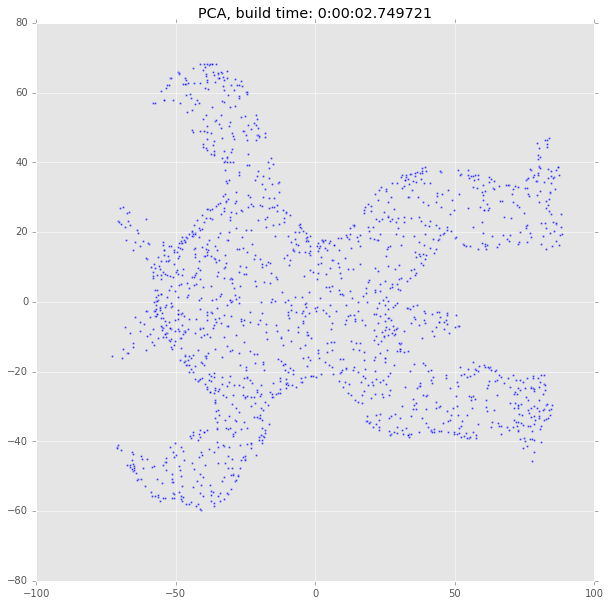

In [28]:
# Lab.4.2.3. Re-run the application! Then, answer the questions below:

# Time the execution of PCA 5000x
t1 = datetime.datetime.now()
for i in range(5000): pca = do_PCA(armadillo)
time_delta = datetime.datetime.now() - t1

# Render the newly transformed PCA armadillo!
if not pca is None:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title('PCA, build time: ' + str(time_delta))
    ax.scatter(pca[:,0], pca[:,1], c='blue', marker='.', alpha=0.75)

plt.show()

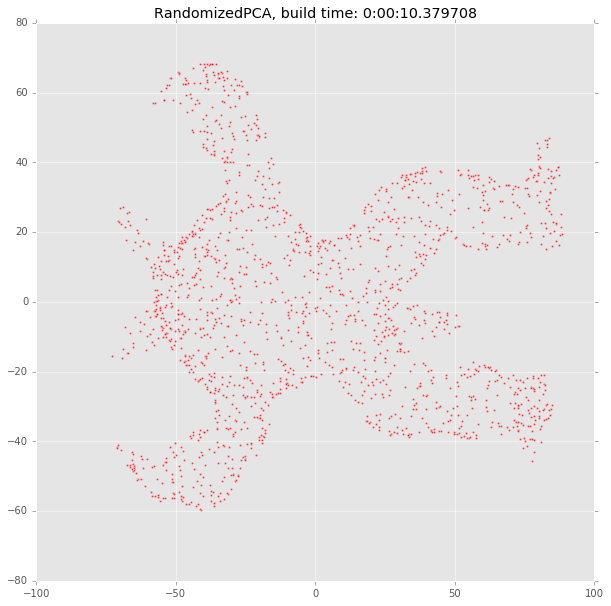

In [29]:
# Time the execution of rPCA 5000x
t1 = datetime.datetime.now()
for i in range(5000): rpca = do_RandomizedPCA(armadillo)
time_delta = datetime.datetime.now() - t1

# Render the newly transformed RandomizedPCA armadillo!
if not rpca is None:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title('RandomizedPCA, build time: ' + str(time_delta))
    ax.scatter(rpca[:,0], rpca[:,1], c='red', marker='.', alpha=0.75)

plt.show()

In [ ]:
# Lab.4.1. Question.
# (# Lab.4.1. Q.a) Were you able to discern any visual differences between the 
#    transformed PCA results and the transformed RandomizedPCA results?
# (Choices)
#   (a) Yes, the RandomizedPCA version was no longer even recognizable as an armadillo
#   (b) Yes, the RandomizedPCA version was a lot less true to the original than the regular PCA version
#   (c) Yes, but it wasn't a lot... just minor differences
#   (d) No, they pretty much looked the same to me correct
# (My answer): D <== correct

# (# Lab.4.1. Q.b)  Which executed faster, RandomizedPCA or PCA?
# (Choices)
#   (a) PCA
#   (b) RandomizedPCA 
# (My answer): b <== correct


## (Explanation):
# (Q.a.) Start this lab by filling in the PCA code, just as you saw in the reading. 
# The code to get RandomizedPCA working is very similar. Take a look at the 
# SciKit-Learn docs for RandomizedPCA and you should see that only one or two 
# alterations are necessary to get that running.

# (Q.b.) To see the execution times, look at the title of your plots. 
# Or alternatively, print them out to the terminal. RandomizedPCA uses 
# some approximation techniques to speed up the execution of PCA, but 
# it's still very accurate. You shouldn't be able to notice any visible changes.


From [Quora Answer](https://www.quora.com/Is-there-any-difference-between-PCA-Principal-component-analysis-and-random-projection-when-preprocessing-data)

* Both are defining a projection from a high-dimensional space into a low-dimensional space -- picking a small set of basis vectors in the high-dimensional space that can be used as a basis (to "explain") the data in the low-dimensional space of these few new basis vectors. 
* The major difference is that PCA is trying hard to pick the "best" basis vectors by looking for directions in which the original data varies most. Random projection is picking the directions randomly! 
* The point is that random projects may be 'worse' because they're blindly picked, but may not be much worse at all, and of course picking them randomly is much faster than running PCA. You seem to be talking about something else, which is feature selection. This is something you might do on the reduced set of features, but is not what random projection or PCA do per se. You can work backwards from the feature selection in the reduced space to figure out which original features seemed most predictive. 

In [31]:
######################################################################

### Lab Assignment 4.2.

In Lab Assignment 1, you applied PCA to a dataset generated by 3D-scanning an actual sculpture. Real life 3D objects are a good segue to PCA, since it's <b>fun</b> to see its effects on a dataset we can see and touch. Another benefit is that all three spatial dimensions, <b>x, y</b>, and <b>z</b>, each measure the same unit-length relative to one another, so no extra consideration need be made to account for PCA's weakness of requiring feature scaling.

But now the <b>fun</b> is over. Gaining some practical experience with real-world datasets, which rarely allot you the luxury of having features all on the same scale, will help you see how critical feature scaling is to PCA. In this lab, you're going to experiment with a subset of UCI's [Chronic Kidney Disease data set](https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease), a collection of samples taken from patients in India over a two month period, some of whom were in the early stages of the disease. The starter code over at /Module4/<b>assignment2.py</b>.

1. Start by looking through the attribute information on the dataset website. Whenever you're given a dataset, the first thing you should do is find out as much about it as possible, both by reading up on any metadata, as well as by prodding through the actual data. Particularly, pay attention to what the docs say about these three variables: <b>bgr, rc</b>, and <b>wc</b>.
2. Load up the <b>kidney_disease.csv</b> dataset from the /Module4/Datasets/ directory, and drop all rows that have any nans. You're probably already a pro at doing that by now. In addition to getting rid of nans, did you know that the .dropna() method (upon completion) also automatically re-checks your features and assigns them an appropriate inferred data types?
3. Use an appropriate indexer command to select only the following columns: <b>bgr, rc</b>, and <b>wc</b>. Or alternatively, you can drop every other column, but it's probably easier to just use an indexer to select the one's you wish to keep.
4. Do a check of your dataframe's dtypes. Anything that didn't make it to the right type, you may want to investigate. Look through the data and identify why the conversion failed. These types of problems often arise when you aren't in control of how your data is organized. Luckily the issue isn't too bad so once you've identified it, you can fix it through simple numeric coercion.
5. Print the variance of your dataset, as well as a .describe() printout.
6. Reduce your dataset to two principal components by run it through PCA, then check out the resulting visualization.



In [117]:
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt
%pylab inline 
plt.style.use('ggplot') # Look Pretty

# Do * NOT * alter this line, until instructed!
scaleFeatures = False

# TODO: Load up the dataset and remove any and all Rows that have a nan. 
mydf = pd.read_csv('Datasets/kidney_disease.csv')
mydf = mydf.dropna(axis=0)
mydf.head()

Populating the interactive namespace from numpy and matplotlib


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
9,9,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,11,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
14,14,68,80,1.010,3,2,normal,abnormal,present,present,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
20,20,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd


In [118]:
# Create some color coded labels; the actual label feature
# will be removed prior to executing PCA, since it's unsupervised.
# You're only labeling by color so you can see the effects of PCA
labels = ['red' if i=='ckd' else 'green' for i in mydf.classification]

In [119]:
# Lab.4.2.3. 
# Use an appropriate indexer command to select only the following columns: bgr, rc, and wc. 
# Or alternatively, you can drop every other column, but it's probably easier to just use 
# an indexer to select the one's you wish to keep.
mydf2 = mydf.loc[:, ['bgr','rc','wc']]
mydf2.head()

,bgr,rc,wc
3,117,3.9,6700
9,70,3.7,12100
11,380,3.8,4500
14,157,2.6,11000
20,173,3.2,9200


In [120]:
# Lab.4.2.4. Do a check of your dataframe's dtypes. 
# Anything that didn't make it to the right type, you may want to investigate. 
# Look through the data and identify why the conversion failed. These types of problems 
# often arise when you aren't in control of how your data is organized. Luckily the issue 
# isn't too bad so once you've identified it, you can fix it through simple numeric coercion.
mydf2.dtypes

bgr    float64
rc      object
wc      object
dtype: object

In [121]:
# Convert to numeric type
mydf2.rc = pd.to_numeric(mydf2.rc, errors='coerce')
mydf2.wc = pd.to_numeric(mydf2.wc, errors='coerce')
mydf2.dtypes

bgr    float64
rc     float64
wc       int64
dtype: object

In [122]:
# Lab.4.2.5. Print the variance of your dataset, as well as a .describe() printout.
# TODO: Print out and check your dataframe's dtypes. You'll probably
# want to call 'exit()' after you print it out so you can stop the
# program's execution.
#
# You can either take a look at the dataset webpage in the attribute info
# section: https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease
# or you can actually peek through the dataframe by printing a few rows.

# What kind of data type should these three columns be? If Pandas didn't
# properly detect and convert them to that data type for you, then use
# an appropriate command to coerce these features into the right type.
mydf2.describe()

,bgr,rc,wc
count,158.000000,158.000000,158.000000
mean,131.341772,4.891772,8475.949367
std,64.939832,1.019364,3126.880181
min,70.000000,2.100000,3800.000000
25%,97.000000,4.500000,6525.000000
50%,115.500000,4.950000,7800.000000
75%,131.750000,5.600000,9775.000000
max,490.000000,8.000000,26400.000000


In [123]:
# TODO: This method assumes your dataframe is called df. If it isn't,
# make the appropriate changes. Don't alter the code in scaleFeatures()
# just yet though!
#
# .. your code adjustment here ..
#if scaleFeatures: mydf2 = helper.scaleFeatures(mydf2)

In [124]:
import math
import pandas as pd
from sklearn import preprocessing

# A Note on SKLearn .transform() calls:
#
# Any time you transform your data, you lose the column header names.
# This actually makes complete sense. There are essentially two types
# of transformations, those that change the scale of your features,
# and those that change your features entire. Changing the scale would
# be like changing centimeters to inches. Changing the features would
# be like using PCA to reduce 300 columns to 30. In either case, the
# original column's units have been altered or no longer exist, so it's
# up to you to rename your columns after ANY transformation. Due to
# this, SKLearn returns an NDArray from *transform() calls.

def scaleFeaturesFunc(df):
    # SKLearn has many different methods for doing transforming your features 
    # by scaling them (this is a type of pre-processing). 
    # RobustScaler, Normalizer, MinMaxScaler, MaxAbsScaler, StandardScaler...
    # http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
    #
    # However in order to be effective at PCA, there are a few requirements
    # that must be met, and which will drive the selection of your scaler.
    # PCA required your data is standardized -- in other words it's mean is
    # equal to 0, and it has ~unit variance.
    #
    # SKLearn's regular Normalizer doesn't zero out the mean of your data,
    # it only clamps it, so it's inappropriate to use here (depending on
    # your data). MinMaxScaler and MaxAbsScaler both fail to set a unit
    # variance, so you won't be using them either. RobustScaler can work,
    # again depending on your data (watch for outliers). For these reasons
    # we're going to use the StandardScaler. Get familiar with it by visiting
    # these two websites:
    # http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler
    # http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
    #
    # ------------------------------------------------------------------------
    # Feature scaling is the type of transformation that only changes the scale 
    # and not number of features, so we'll use the original dataset column names. 
    # However we'll keep in mind that the _units_ have been altered:
    scaled = preprocessing.StandardScaler().fit_transform(df)
    scaled = pd.DataFrame(scaled, columns=df.columns)
    print "New Variances:\n", scaled.var()
    print "New Describe:\n", scaled.describe()
    return scaled


def drawVectors(transformed_features, components_, columns, plt, scaled):
    if not scaled:
        return plt.axes() # No cheating ;-)

    num_columns = len(columns)

    # This funtion will project your *original* feature (columns)
    # onto your principal component feature-space, so that you can
    # visualize how "important" each one was in the multi-dimensional scaling

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ## visualize projections 

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print "Features by importance:\n", important_features

    ax = plt.axes()

    for i in range(num_columns):
        # Use an arrow to project each original feature as a
        # labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax

if scaleFeatures: 
    print "scaleFeatures: ", scaleFeatures, "\n"
    mydf2 = scaleFeaturesFunc(mydf2)

In [125]:
# Lab.4.2.6. Reduce your dataset to two principal components by run it through PCA, 
#  then check out the resulting visualization.'''

# TODO: PCA Operates based on variance. The variable with the greatest
# variance will dominate. Go ahead and peek into your data using a
# command that will check the variance of every feature in your dataset.
# Print out the results. Also print out the results of running .describe
# on your dataset.
#
# Hint: If you don't see all three variables: 'bgr','wc' and 'rc', then
# you probably didn't complete the previous step properly.
#

# TODO: Run PCA on your dataset and reduce it to 2 components
# Ensure your PCA instance is saved in a variable called 'pca',
# and that the results of your transformation are saved in 'T'.
#
# .. your code here ..

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
T = pca.fit_transform(mydf2)

print pca, '\n'
print T[0:10,:]

PCA(copy=True, n_components=2, whiten=False) 

[[ -1.77599523e+03   6.50884111e+00]
 [  3.62374523e+03   7.73043491e+01]
 [ -3.97481492e+03  -2.66180054e+02]
 [  2.52413939e+03  -1.45475306e+01]
 [  7.24227321e+02  -3.84761986e+01]
 [ -1.57609407e+03   2.93866865e+01]
 [  1.12462435e+03  -1.27705575e+02]
 [  1.04236792e+04   1.07270983e+02]
 [ -1.27540082e+03  -1.27281567e+02]
 [  6.12413081e+03  -4.67849769e+00]]


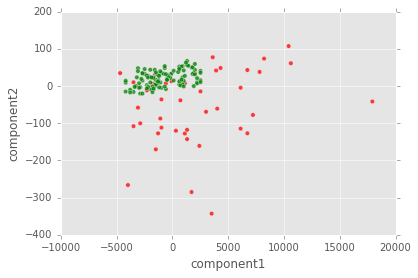

In [126]:
# Plot the transformed data as a scatter plot. Recall that transforming
# the data will result in a NumPy NDArray. You can either use MatPlotLib
# to graph it directly, or you can convert it to DataFrame and have pandas
# do it for you.
#
# Since we've already demonstrated how to plot directly with MatPlotLib in
# Module4/assignment1.py, this time we'll convert to a Pandas Dataframe.
#
# Since we transformed via PCA, we no longer have column names. We know we
# are in P.C. space, so we'll just define the coordinates accordingly:

#ax = helper.drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
#plt.figure(figsize=(10,10))
ax = drawVectors(T, pca.components_, mydf2.columns.values, plt, scaleFeatures)
T = pd.DataFrame(T)
T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)
plt.show()

In [127]:
# Lab.4.2. Question 3. # (Lab.4.2. Question 1&2는 중요하지 않아 skipped!!)
# You're almost there! The last thing you have to do, and the purpose of this lab really, 
# is to see how feature scaling alters your PCA results.

# Change the line that reads:
#    scaleFeatures = False
# So that is now reads:
#    scaleFeatures = True

# Also take a look inside of assignment2_helper.py. There are some important notes in there 
# about what SKLearn's *transform() methods do, and why they do it. You will need to know 
# this information for future labs!
# Re-run your assignment and then answer the questions:

In [128]:
# *ALTER* this line, until instructed!
scaleFeatures = True

# TODO: Load up the dataset and remove any and all Rows that have a nan. 
mydf = pd.read_csv('Datasets/kidney_disease.csv')
mydf = mydf.dropna(axis=0)
mydf.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
9,9,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,11,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
14,14,68,80,1.010,3,2,normal,abnormal,present,present,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
20,20,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd


In [129]:
mydf2 = mydf.loc[:, ['bgr','rc','wc']]
mydf2.head()

,bgr,rc,wc
3,117,3.9,6700
9,70,3.7,12100
11,380,3.8,4500
14,157,2.6,11000
20,173,3.2,9200


In [130]:
mydf2.dtypes

bgr    float64
rc      object
wc      object
dtype: object

In [131]:
mydf2.rc = pd.to_numeric(mydf2.rc, errors='coerce')
mydf2.wc = pd.to_numeric(mydf2.wc, errors='coerce')
mydf2.dtypes

bgr    float64
rc     float64
wc       int64
dtype: object

In [132]:
mydf2.describe()

,bgr,rc,wc
count,158.000000,158.000000,158.000000
mean,131.341772,4.891772,8475.949367
std,64.939832,1.019364,3126.880181
min,70.000000,2.100000,3800.000000
25%,97.000000,4.500000,6525.000000
50%,115.500000,4.950000,7800.000000
75%,131.750000,5.600000,9775.000000
max,490.000000,8.000000,26400.000000


In [133]:
import math
import pandas as pd
from sklearn import preprocessing

# A Note on SKLearn .transform() calls:
#
# Any time you transform your data, you lose the column header names.
# This actually makes complete sense. There are essentially two types
# of transformations,  those that change the scale of your features,
# and those that change your features entire. Changing the scale would
# be like changing centimeters to inches. Changing the features would
# be like using PCA to reduce 300 columns to 30. In either case, the
# original column's units have been altered or no longer exist, so it's
# up to you to rename your columns after ANY transformation. Due to
# this, SKLearn returns an NDArray from *transform() calls.

def scaleFeaturesFunc(df):
    # SKLearn has many different methods for doing transforming your
    # features by scaling them (this is a type of pre-processing).
    # RobustScaler, Normalizer, MinMaxScaler, MaxAbsScaler, StandardScaler...
    # http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
    #
    # However in order to be effective at PCA, there are a few requirements
    # that must be met, and which will drive the selection of your scaler.
    # PCA required your data is standardized -- in other words it's mean is
    # equal to 0, and it has ~unit variance.
    #
    # SKLearn's regular Normalizer doesn't zero out the mean of your data,
    # it only clamps it, so it's inappropriate to use here (depending on
    # your data). MinMaxScaler and MaxAbsScaler both fail to set a unit
    # variance, so you won't be using them either. RobustScaler can work,
    # again depending on your data (watch for outliers). For these reasons
    # we're going to use the StandardScaler. Get familiar with it by visiting
    # these two websites:
    #
    # http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler
    #
    # http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
    #


    # ---------
    # Feature scaling is the type of transformation that only changes the
    # scale and not number of features, so we'll use the original dataset
    # column names. However we'll keep in mind that the _units_ have been
    # altered:
    scaled = preprocessing.StandardScaler().fit_transform(df)
    scaled = pd.DataFrame(scaled, columns=df.columns)
    print "New Variances:\n", scaled.var()
    print "New Describe:\n", scaled.describe()
    return scaled


def drawVectors(transformed_features, components_, columns, plt, scaled):
    if not scaled:
        return plt.axes() # No cheating ;-)

    num_columns = len(columns)

    # This funtion will project your *original* feature (columns)
    # onto your principal component feature-space, so that you can
    # visualize how "important" each one was in the
    # multi-dimensional scaling

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ## visualize projections

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print "Features by importance:\n", important_features

    ax = plt.axes()

    for i in range(num_columns):
        # Use an arrow to project each original feature as a
        # labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax

print scaleFeatures

if scaleFeatures: 
    print "calling scaleFeaturesFunc\n"
    mydf2 = scaleFeaturesFunc(mydf2)

True
calling scaleFeaturesFunc

New Variances:
bgr    1.006369
rc     1.006369
wc     1.006369
dtype: float64
New Describe:
                bgr            rc            wc
count  1.580000e+02  1.580000e+02  1.580000e+02
mean  -9.755075e-17  1.068063e-16  9.345548e-17
std    1.003180e+00  1.003180e+00  1.003180e+00
min   -9.475974e-01 -2.747446e+00 -1.500159e+00
25%   -5.305059e-01 -3.855519e-01 -6.259123e-01
50%   -2.447210e-01  5.730335e-02 -2.168611e-01
75%    6.306235e-03  6.969831e-01  4.167672e-01
max    5.540492e+00  3.058878e+00  5.750474e+00


In [134]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
T = pca.fit_transform(mydf2)

print pca, '\n'
print T[0:10,:]

PCA(copy=True, n_components=2, whiten=False) 

[[ 0.20280326 -0.61538445]
 [ 0.73915766  1.15820015]
 [ 2.36388805 -3.09738967]
 [ 2.05754765 -0.00959821]
 [ 1.55091814 -0.48108831]
 [ 0.33998968 -0.51970208]
 [ 1.90134205 -0.80596544]
 [ 1.93261129  2.986518  ]
 [ 1.29755832 -1.34414484]
 [ 2.30714195  1.07760643]]


Features by importance:
[(3.999807155688486, 'wc'), (3.2588876641210867, 'bgr'), (3.0097527529983656, 'rc')]


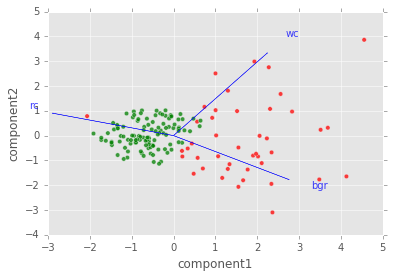

In [135]:
ax = drawVectors(T, pca.components_, mydf2.columns.values, plt, scaleFeatures)
T = pd.DataFrame(T)
T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)
plt.show()

In [ ]:
# Lab.4.2. Question 3.
# (# Lab.4.2. Q3.a) Did scaling your features affect their variances at all?
# (My answer): Yes <== correct


# (# Lab.4.2. Q3.a) After scaling your features, are the green patients without chronic kidney disease 
#  more cleanly separable from the red patients with chronic kidney disease?
# (a) They are less separable
# (b) There isn't much change
# (c) They are more separable  (My answer) <== Correct

In [ ]:
######################################################################

### Lab Assignment 4.3.

You're not quite done with [Chronic Kidney Disease yet](https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease) — we still need to beat it! In the previous lab assignment, you focused only on three features out of the entire dataset: <b>bgr, rc</b>, and <b>wc</b>. That should have seemed strange to you. How did we know to direct your attention only to those features? The answer, of course, is through <b>PCA</b>. By running PCA on the raw dataset data, we were able to find suitable candidate features to show the importance of feature scaling. For this lab, there will be no starter code. Copy your finished Lab 2, <b>assignment2.py</b> file over as <b>assignment3.py</b> and start working from that.

1. Head back over to the dataset page (or you can look at the kidney_disease.names file in your /Module4/Datasets/ directory). Each column has a type listed, e.g. numeric, nominal, etc. Here is a formatted list of the nominal features for your copy and pasting pleasure:

    ['id', 'classification', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

     Instead of using an indexer to select just the <b>bgr, rc</b>, and <b>wc</b>, alter your assignment code to <b>drop</b> all the nominal features listed above. Be sure you select the right axis for columns and not rows, otherwise Pandas will complain!
     <br/>
2. Right after you print out your dataset's dtypes, add an exit() so you can inspect the results. Does everything look like it should / properly numeric? If not, make code changes to coerce the remaining column(s).

3. Run your assignment and then answer the questions below.

4. Alter your code so that you only drop the <b>id</b> and <b>classification</b> columns. For the remaining 10 nominal features, properly encode them by as explained in the Feature Representation section by creating new, boolean columns using Pandas .get_dummies(). You should be able to carry that out with a single line of code. Run your assignment again and see if your results have changed at all.

<b>Important Notes:</b>

Once you've completed this lab, be sure to drop by the Dive Deeper section and read the article on using PCA on boolean features! Also, it's important to keep in mind that PCA is an unsupervised learning technique. It neither knows or even cares about your data's labels and classifications. In the previous two labs, you used a pre-labeled dataset only to see how applying PCA transformations can effect other machine learning modeling process further down the analysis pipeline.

In [189]:
# 4.3.1. 
# Head back over to the dataset page (or you can look at the kidney_disease.names file in your
#   /Module4/Datasets/ directory). Each column has a type listed, e.g. numeric, nominal, etc. 
#   Here is a formatted list of the nominal features for your copy and pasting pleasure:
#
#   ['id', 'classification', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
#
#   Instead of using an indexer to select just the bgr, rc, and wc, alter your assignment 
#   code to drop all the nominal features listed above. Be sure you select the right axis 
#   for columns and not rows, otherwise Pandas will complain!
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt
%pylab inline 
plt.style.use('ggplot') # Look Pretty

scaleFeatures = True

# TODO: Load up the dataset and remove any and all Rows that have a nan. 
mydf = pd.read_csv('Datasets/kidney_disease.csv')
cols_to_drop = ['id', 'classification', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
mydf3 = mydf.drop( cols_to_drop, axis = 1 )
mydf3.head()

Populating the interactive namespace from numpy and matplotlib


,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,48,80,1.020,1,0,121,36,1.2,NaN,NaN,15.4,44,7800,5.2
1,7,50,1.020,4,0,NaN,18,0.8,NaN,NaN,11.3,38,6000,NaN
2,62,80,1.010,2,3,423,53,1.8,NaN,NaN,9.6,31,7500,NaN
3,48,70,1.005,4,0,117,56,3.8,111,2.5,11.2,32,6700,3.9
4,51,80,1.010,2,0,106,26,1.4,NaN,NaN,11.6,35,7300,4.6


In [190]:
mydf3 = mydf3.dropna(axis=0)

In [191]:
mydf3.dtypes

age     float64
bp      float64
sg      float64
al      float64
su      float64
bgr     float64
bu      float64
sc      float64
sod     float64
pot     float64
hemo    float64
pcv      object
wc       object
rc       object
dtype: object

In [192]:
# 4.3.2. 
# Right after you print out your dataset's dtypes, add an exit() so you can inspect the 
# results. Does everything look like it should / properly numeric? If not, make code changes 
# to coerce the remaining column(s).
mydf3.pcv = pd.to_numeric(mydf3.pcv, errors="coerce")
mydf3.wc = pd.to_numeric(mydf3.wc, errors="coerce")
mydf3.rc = pd.to_numeric(mydf3.rc, errors="coerce")
mydf3.dtypes

age     float64
bp      float64
sg      float64
al      float64
su      float64
bgr     float64
bu      float64
sc      float64
sod     float64
pot     float64
hemo    float64
pcv       int64
wc        int64
rc      float64
dtype: object

In [193]:
# 4.3.3. Run your assignment and then answer the questions below.
from sklearn.decomposition import PCA

if scaleFeatures: 
    mydf3 = scaleFeaturesFunc(mydf3)
    
pca = PCA(n_components = 2)
T = pca.fit_transform(mydf3)

print pca, '\n'
print T[0:10,:]

New Variances:
age     1.00495
bp      1.00495
sg      1.00495
al      1.00495
su      1.00495
bgr     1.00495
bu      1.00495
sc      1.00495
sod     1.00495
pot     1.00495
hemo    1.00495
pcv     1.00495
wc      1.00495
rc      1.00495
dtype: float64
New Describe:
                age            bp            sg            al            su  \
count  2.030000e+02  2.030000e+02  2.030000e+02  2.030000e+02  2.030000e+02   
mean   2.048170e-16 -5.939420e-16 -2.481868e-14  6.508204e-16 -6.480859e-16   
std    1.002472e+00  1.002472e+00  1.002472e+00  1.002472e+00  1.002472e+00   
min   -2.939002e+00 -2.166393e+00 -2.493056e+00 -6.063953e-01 -3.709744e-01   
25%   -6.317481e-01 -4.281409e-01 -7.173002e-01 -6.063953e-01 -3.709744e-01   
50%    2.014269e-01  4.409851e-01  1.705775e-01 -6.063953e-01 -3.709744e-01   
75%    7.141500e-01  4.409851e-01  1.058455e+00  4.992776e-01 -3.709744e-01   
max    2.444590e+00  3.048363e+00  1.058455e+00  2.342066e+00  4.787095e+00   

                bgr 

Features by importance:
[(2.7494306832278093, 'wc'), (1.6326899432670168, 'bgr'), (1.4435904637189005, 'rc')]


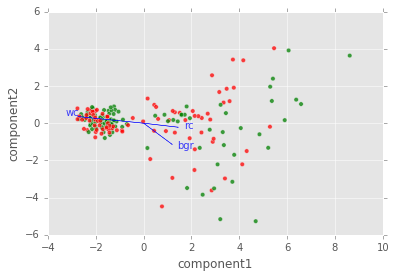

In [194]:
ax = drawVectors(T, pca.components_, mydf2.columns.values, plt, scaleFeatures)
T = pd.DataFrame(T)
T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)
plt.show()

In [195]:
# 4.3.4. 
# Alter your code so that you only drop the id and classification columns. 
# For the remaining 10 nominal features, properly encode them by as explained 
# in the Feature Representation section by creating new, boolean columns using 
# Pandas .get_dummies(). You should be able to carry that out with a single line of code. 
# Run your assignment again and see if your results have changed at all.
mydf = pd.read_csv('Datasets/kidney_disease.csv')
mydf3b = mydf.drop( ['id','classification'], axis = 1 )
mydf3b.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48,80,1.020,1,0,NaN,normal,notpresent,notpresent,121,...,15.4,44,7800,5.2,yes,yes,no,good,no,no
1,7,50,1.020,4,0,NaN,normal,notpresent,notpresent,NaN,...,11.3,38,6000,NaN,no,no,no,good,no,no
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,9.6,31,7500,NaN,no,yes,no,poor,no,yes
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,11.2,32,6700,3.9,yes,no,no,poor,yes,yes
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,11.6,35,7300,4.6,no,no,no,good,no,no


In [196]:
dummy_columns = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
mydf3_getdummy = pd.get_dummies(mydf3b, columns = dummy_columns)
mydf3_getdummy.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,dm_yes,cad_ no,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
0,48,80,1.020,1,0,121,36,1.2,NaN,NaN,...,1,0,1,0,1,0,1,0,1,0
1,7,50,1.020,4,0,NaN,18,0.8,NaN,NaN,...,0,0,1,0,1,0,1,0,1,0
2,62,80,1.010,2,3,423,53,1.8,NaN,NaN,...,1,0,1,0,0,1,1,0,0,1
3,48,70,1.005,4,0,117,56,3.8,111,2.5,...,0,0,1,0,0,1,0,1,0,1
4,51,80,1.010,2,0,106,26,1.4,NaN,NaN,...,0,0,1,0,1,0,1,0,1,0


In [197]:
mydf3_getdummy = mydf3_getdummy.dropna(axis=0)
mydf3_getdummy.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,dm_yes,cad_ no,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
3,48,70,1.005,4,0,117,56,3.8,111,2.5,...,0,0,1,0,0,1,0,1,0,1
5,60,90,1.015,3,0,74,25,1.1,142,3.2,...,1,0,1,0,1,0,0,1,1,0
9,53,90,1.020,2,0,70,107,7.2,114,3.7,...,1,0,1,0,0,1,1,0,0,1
11,63,70,1.010,3,0,380,60,2.7,131,4.2,...,1,0,1,0,0,1,0,1,1,0
12,68,70,1.015,3,1,208,72,2.1,138,5.8,...,1,0,0,1,0,1,0,1,1,0


In [198]:
mydf3_getdummy.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
rbc_abnormal      float64
rbc_normal        float64
pc_abnormal       float64
pc_normal         float64
pcc_notpresent    float64
pcc_present       float64
ba_notpresent     float64
ba_present        float64
htn_no            float64
htn_yes           float64
dm_\tno           float64
dm_\tyes          float64
dm_ yes           float64
dm_no             float64
dm_yes            float64
cad_\tno          float64
cad_no            float64
cad_yes           float64
appet_good        float64
appet_poor        float64
pe_no             float64
pe_yes            float64
ane_no            float64
ane_yes           float64
dtype: objec

In [199]:
mydf3_getdummy.pcv = pd.to_numeric(mydf3_getdummy.pcv, errors="coerce")
mydf3_getdummy.wc = pd.to_numeric(mydf3_getdummy.wc, errors="coerce")
mydf3_getdummy.rc = pd.to_numeric(mydf3_getdummy.rc, errors="coerce")
mydf3_getdummy.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                 int64
wc                  int64
rc                float64
rbc_abnormal      float64
rbc_normal        float64
pc_abnormal       float64
pc_normal         float64
pcc_notpresent    float64
pcc_present       float64
ba_notpresent     float64
ba_present        float64
htn_no            float64
htn_yes           float64
dm_\tno           float64
dm_\tyes          float64
dm_ yes           float64
dm_no             float64
dm_yes            float64
cad_\tno          float64
cad_no            float64
cad_yes           float64
appet_good        float64
appet_poor        float64
pe_no             float64
pe_yes            float64
ane_no            float64
ane_yes           float64
dtype: objec

In [200]:
if scaleFeatures: 
    mydf3_getdummy = scaleFeaturesFunc(mydf3_getdummy)
    
pca = PCA(n_components = 2)
T = pca.fit_transform(mydf3_getdummy)

print pca, '\n'
print T[0:10,:]

New Variances:
age               1.00495
bp                1.00495
sg                1.00495
al                1.00495
su                1.00495
bgr               1.00495
bu                1.00495
sc                1.00495
sod               1.00495
pot               1.00495
hemo              1.00495
pcv               1.00495
wc                1.00495
rc                1.00495
rbc_abnormal      1.00495
rbc_normal        1.00495
pc_abnormal       1.00495
pc_normal         1.00495
pcc_notpresent    1.00495
pcc_present       1.00495
ba_notpresent     1.00495
ba_present        1.00495
htn_no            1.00495
htn_yes           1.00495
dm_\tno           0.00000
dm_\tyes          0.00000
dm_ yes           0.00000
dm_no             1.00495
dm_yes            1.00495
cad_\tno          0.00000
cad_no            1.00495
cad_yes           1.00495
appet_good        1.00495
appet_poor        1.00495
pe_no             1.00495
pe_yes            1.00495
ane_no            1.00495
ane_yes           1.004

Features by importance:
[(2.7286075505309815, 'dm_yes'), (2.7117209753042317, 'dm_no'), (2.692623976150388, 'htn_yes'), (2.6689940308015907, 'htn_no'), (2.6618334128719794, 'hemo'), (2.6539757188528386, 'pcv'), (2.575130040378792, 'al'), (2.439763231531564, 'pc_abnormal'), (2.427126472713153, 'rc'), (2.3425117842062178, 'sg'), (2.3043218552062874, 'su'), (2.3001252330394895, 'ane_yes'), (2.2854685763593414, 'bgr'), (2.27348072575542, 'ane_no'), (2.2713121969306873, 'bu'), (2.2669428067052055, 'sc'), (2.190318345939061, 'pcc_present'), (2.189698407806018, 'pc_normal'), (2.115202712702706, 'pcc_notpresent'), (2.077758884755304, 'pe_yes'), (2.072035968334616, 'appet_poor'), (2.04499807865419, 'appet_good'), (2.0420744335935783, 'pe_no'), (2.007379251320915, 'sod'), (1.8366655070670814, 'cad_yes'), (1.8111225783850615, 'rbc_normal'), (1.7728235571250615, 'cad_no'), (1.4765303122674323, 'rbc_abnormal'), (1.4762387973827862, 'age'), (1.4497420290233047, 'ba_present'), (1.360733821721151, 'ba

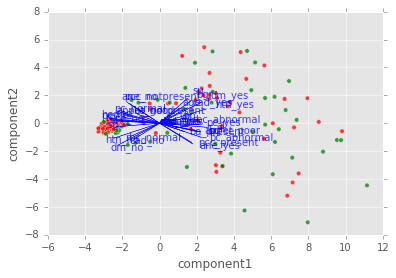

In [201]:
ax = drawVectors(T, pca.components_, mydf3_getdummy.columns.values, plt, scaleFeatures)
T = pd.DataFrame(T)
T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)
plt.show()

In [202]:
# Lab.4.3. Question.
# (# Lab.4.3. Q.a) After adding in all of numeric columns, do the green, non-chronic kidney 
#   disease patients group closer together than before?
# (My answer): Yes <== correct


# (# Lab.4.2. Q.a) After converting the nominal features to boolean features, do the green, 
#  non-chronic kidney disease patients group even closer together than before?
# (My answer): Yes <== correct